# GRIP | THE SPARKS FOUNDATION.

##  Data Science and Business Analytics (Batch: MAY_2021).

# TASK#1 : Prediction using Supervised Machine Learning.

Predict the percentage of a student based on the number of study hours. 
This is a simple linear regression task as it involves just 2 variables :               
1) Number of study hours.             
2) Score percentage of a student.

### Import libraries :

In [1]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, precision_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from math import sqrt

### Reading CSV file to get the Dataset :

In [2]:
df = pd.read_csv("student_scores.csv") 
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Data Preprocessing :

In [3]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  
 
train_X, test_X, train_Y, test_Y = train_test_split(X, y, 
                            test_size=0.2, random_state=0)   #Splitting data to train_X, train_Y AND test_X, test_Y.  



train_X = train_X.reshape(-1,1)   #Reshape the train_X as it has only one feature.

test_X = test_X.reshape(-1,1)    #Reshape the test_X as it has only one feature.

In [4]:
print("train_X :", train_X)
print("train_Y :", train_Y)

train_X : [[3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]]
train_Y : [35 24 86 76 17 47 85 42 81 88 67 30 25 60 30 75 21 54 95 41]


## Plotting the Data :

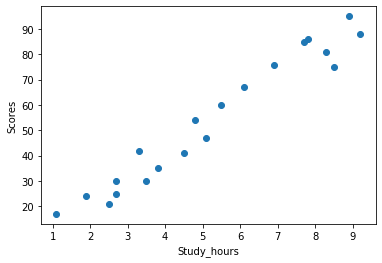

In [5]:
plt.scatter(train_X , train_Y)
plt.xlabel("Study_hours")
plt.ylabel("Scores")
plt.show()

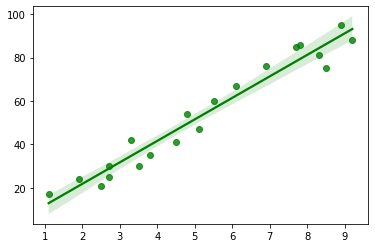

In [6]:
sns.regplot(x = train_X , y = train_Y, truncate = True, color = 'g')

### Fit Linear_Regression to the Model :

In [7]:
regr = LinearRegression()
model = regr.fit(train_X , train_Y)
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


### Printing coefficient and Intercept of hypothesis :

In [8]:
print("Coefficient :", model.coef_)
print('Intercept :', model.intercept_)

Coefficient : [9.91065648]
Intercept : 2.018160041434683


### Getting predicted line on train_X  :

In [9]:
predicted_Y = model.intercept_ + model.coef_*train_X

### Plot Regression Line on the data :

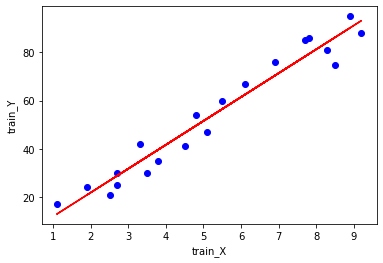

In [10]:
plt.plot(train_X , train_Y, 'bo')
plt.plot(train_X , predicted_Y, 'r')
plt.xlabel("train_X")
plt.ylabel("train_Y")
plt.show()

### Predicting on test set :

In [11]:
Pred_Y = model.predict(test_X)

### Evaluation Metrics :

In [12]:
mae = mean_absolute_error(test_Y, Pred_Y)
mse = mean_squared_error(test_Y , Pred_Y)
rmse = sqrt(mean_squared_error(test_Y , Pred_Y))

print('Mean Absolute Error :', mae) 
print('Mean Squared Error :', mse)
print('Root Mean Squared Error :', rmse)

Mean Absolute Error : 4.183859899002975
Mean Squared Error : 21.5987693072174
Root Mean Squared Error : 4.6474476121003665


### Predict the Score of the Student if s/he study for 9.25 hours per day :

In [13]:
arr = np.array([9.25])
pred_score = arr.reshape(-1,1)
Predicted_unseen = model.predict(pred_score)
print(Predicted_unseen)

[93.69173249]
